<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Familiarize Yourself with the Dataset

In [6]:
# Display the first 5 rows of the dataset.

boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
# Display the data types of each column.

boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [8]:
# Check for missing values in each column 
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [9]:
# Check for duplicate rows.
boston_df.duplicated().sum()


0

In [13]:
# Display the correlation matrix of the dataset.
boston_df.corr(method='pearson')

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


## Task 2: Generate Descriptive Statistics and Visualizations


In [15]:
# Display descriptive statistics of the dataset.
boston_df.describe()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


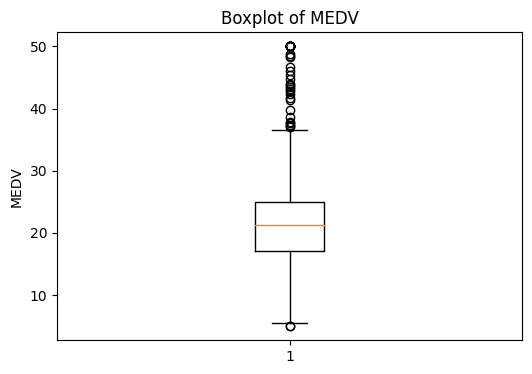

In [17]:
# Create a boxplot for MEDV (Median value of owner-occupied homes). 
pyplot.figure(figsize=(6,4))
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Boxplot of MEDV')
pyplot.ylabel('MEDV')
pyplot.show()

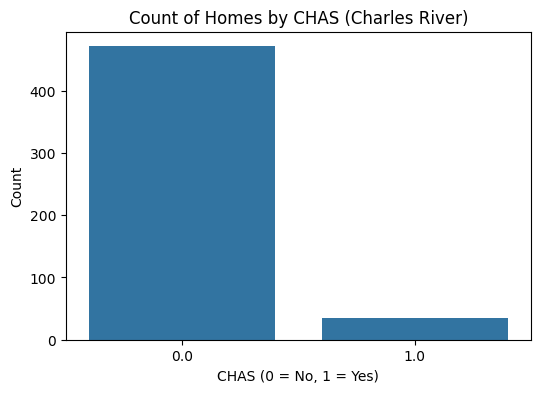

In [18]:
# Create a bar plot for CHAS (Charles River dummy variable).


pyplot.figure(figsize=(6,4))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Count of Homes by CHAS (Charles River)')
pyplot.xlabel('CHAS (0 = No, 1 = Yes)')
pyplot.ylabel('Count')
pyplot.show()

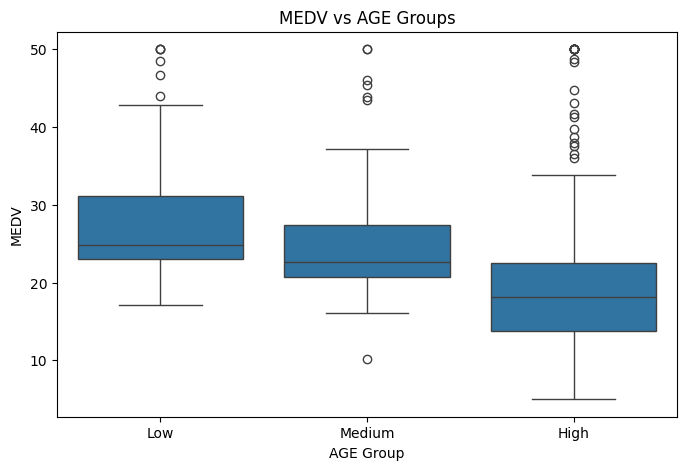

In [19]:
# Discretize AGE into three groups and create a boxplot of MEDV versus these groups:
boston_df['AGE_Group'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['Low', 'Medium', 'High']
) 

pyplot.figure(figsize=(8,5))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('MEDV vs AGE Groups')
pyplot.xlabel('AGE Group')
pyplot.ylabel('MEDV')
pyplot.show()

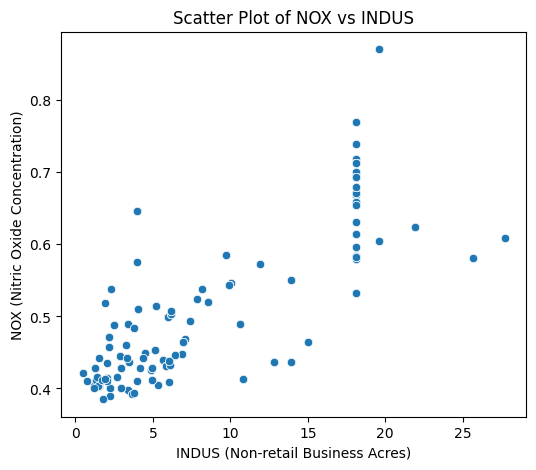

In [20]:
# Create a scatter plot showing the relationship between NOX (nitric oxide concentrations) and INDUS (non-retail business acres).


pyplot.figure(figsize=(6,5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('INDUS (Non-retail Business Acres)')
pyplot.ylabel('NOX (Nitric Oxide Concentration)')
pyplot.show()

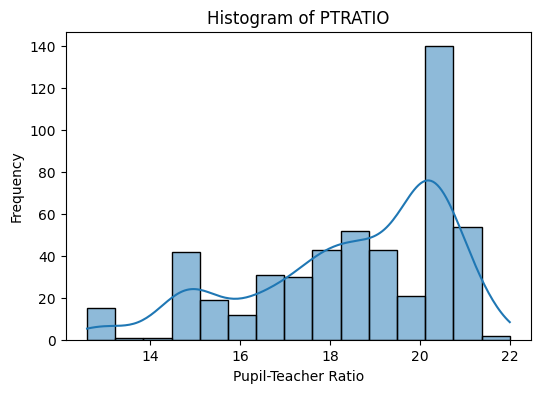

In [21]:
# Create a histogram for PTRATIO (pupil-teacher ratio).

pyplot.figure(figsize=(6,4))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Histogram of PTRATIO')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show() 

## Task 3: Apply Statistical Tests


### 1. Use Levene’s test to check if the variances of MEDV for homes bounded by the Charles River (CHAS = 1) and those not bounded (CHAS = 0) are equal. 

In [24]:
# Use Levene’s test to check if the variances of MEDV for homes 
# bounded by the Charles River (CHAS = 1) and those not bounded (CHAS = 0) are equal. 

from scipy.stats import levene
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [29]:
stat, p_value = levene(medv_chas1, medv_chas0, center='median')
print("Levene’s Test Statistic:", stat)
print("p-value:", p_value)

Levene’s Test Statistic: 4.590342218715871
p-value: 0.03263097600633006


There is sufficient evidence to conclude that the variances of MEDV differ significantly between homes bounded by the Charles River and those not bounded by the river.

### 2. Perform a T-test to determine if there is a significant difference in MEDV between homes bounded and not bounded by the Charles River.

In [33]:

from scipy.stats import ttest_ind


t_stat, p_value = ttest_ind(medv_chas1, medv_chas0, equal_var=False)

print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: 3.113291312794837
p-value: 0.003567170098137517


The test showed a statistically significant difference (p = 0.0036 < 0.05). Therefore, we reject the null hypothesis and conclude that mean home values differ between the two groups.

### 3. Conduct an ANOVA test to compare MEDV among the three AGE groups created earlier.

In [35]:
from scipy.stats import f_oneway
medv_low = boston_df[boston_df['AGE_Group'] == 'Low']['MEDV']
medv_medium = boston_df[boston_df['AGE_Group'] == 'Medium']['MEDV']
medv_high = boston_df[boston_df['AGE_Group'] == 'High']['MEDV']

In [36]:
f_stat, p_value = f_oneway(medv_low, medv_medium, medv_high)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15


we reject the null hypothesis and conclude that mean home values differ across AGE categories.

### 4. Perform a Pearson correlation test to assess the relationship between NOX and INDUS.



In [37]:
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Correlation coefficient (r):", corr_coef)
print("p-value:", p_value)


Correlation coefficient (r): 0.7636514469209192
p-value: 7.913361061210442e-98


This suggests a significant linear relationship between nitric oxide concentration and the proportion of industrial land.

### 5. Fit a simple linear regression model to evaluate the impact of DIS (distance to employment centres) on MEDV. Report and interpret the regression results.



In [38]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           1.21e-08
Time:                        16:27:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The results indicate that distance to employment centres has a significant positive association with median home value (β = 1.09, p < 0.001). This implies that homes located farther from employment centres tend to have higher values. Nevertheless, since the model accounts for only 6.2% of the variation in MEDV, most of the variability in housing prices is driven by other variables not included in this model.